In [2]:
#Import LIBRARIES

import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset

#Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data clean up

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

c:\Users\mateo\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_US = df[df['job_country'] == 'United States'].copy()

In [3]:
df_US['job_posted_month'] = df_US['job_posted_date'].dt.strftime('%B')

In [4]:
pivot_table = df_US.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')
pivot_table.reset_index(inplace=True)

pivot_table['month_number'] = pd.to_datetime(pivot_table['job_posted_month'],format= '%B').dt.month
pivot_table.sort_values('month_number', inplace=True)

pivot_table.set_index('job_posted_month', inplace=True)

pivot_table.drop(columns='month_number', inplace=True)

In [5]:
pivot_table

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


In [9]:
df_US_software_pivot = pd.read_csv("https://lukeb.co/software_csv", index_col='job_posted_month')
df_US_software_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [12]:
df_US_MERGED =  pivot_table.merge(df_US_software_pivot, on='job_posted_month')

In [19]:
top_5 = (
    df_US_MERGED
        .sum()
        .sort_values(ascending=False)
        .head()
        .index.tolist()
        )

top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'Data Analyst',
 'Data Scientist']

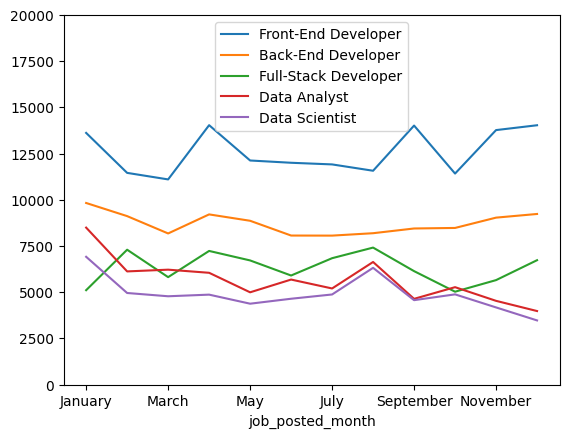

In [23]:
df_US_MERGED[top_5].plot(kind='line')
plt.ylim(0,20000)
plt.legend()

In [50]:
df_us_jobs= df[df['job_country'] == 'United States'].copy()
df_us_jobs['job_posted_month'] = df['job_posted_date'].dt.strftime('%B')

df_monthly_postings = df_us_jobs.groupby('job_posted_month').size().reset_index(name='num_postings')
df_monthly_postings.set_index('job_posted_month', inplace=True)


#temporal columN to get the numers of the months:

df_monthly_postings['month_no'] = pd.to_datetime(df_monthly_postings.index, format='%B').month


#ORDER THE TABLE BASED ON THE NEW MONTH NO COLUMN
df_monthly_postings.sort_values('month_no', inplace=True)


df_monthly_postings.drop(columns='month_no', inplace=True)
df_monthly_postings

,num_postings
job_posted_month,
January,22670
February,18020
March,17904
April,17282
May,15283
June,16694
July,16210
August,21029
September,16313


In [53]:
df_us_jobs.merge(df_monthly_postings,on='job_posted_month', how='right')

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month,num_postings
0,Data Engineer,Data Engineer,"Fort Worth, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-25 13:24:01,False,False,United States,None,NaN,NaN,Programmers.io,"['sql', 'python']","{'programming': ['sql', 'python']}",January,22670
1,Data Engineer,Data Engineer,"San Mateo, CA",via LinkedIn,Full-time,False,"California, United States",2023-01-28 13:07:30,False,True,United States,None,NaN,NaN,Verkada,"['sql', 'python', 'aws', 'looker']","{'analyst_tools': ['looker'], 'cloud': ['aws']...",January,22670
2,Business Analyst,Business Intelligence Intern,"Dallas, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 13:02:07,False,False,United States,None,NaN,NaN,Copart,"['r', 'python', 'sql', 'tableau', 'power bi']","{'analyst_tools': ['tableau', 'power bi'], 'pr...",January,22670
3,Data Engineer,Data Engineer,"Cincinnati, OH",via SimplyHired,Full-time,False,"Texas, United States",2023-01-22 13:08:53,False,False,United States,None,NaN,NaN,Divisions Maintenance Group,"['sql', 'nosql', 'python', 'java', 'c++', 'sca...","{'databases': ['cassandra'], 'libraries': ['ha...",January,22670
4,Data Analyst,Data Analyst,"Tampa, FL",via LinkedIn,Full-time,False,"Florida, United States",2023-01-19 13:19:45,False,False,United States,None,NaN,NaN,Citi,"['sql', 'python', 'unix', 'excel', 'jira']","{'analyst_tools': ['excel'], 'async': ['jira']...",January,22670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206287,Data Analyst,Data/Finance Analyst,"Cedar Rapids, IA",via Jobs Trabajo.org,Full-time,False,"Illinois, United States",2023-12-21 06:01:16,False,True,United States,None,NaN,NaN,Aegon Asset Management,None,None,December,13153
206288,Data Scientist,Data Scientist with Security Clearance,United States,via Trabajo.org,Full-time,False,"Texas, United States",2023-12-05 06:03:50,False,True,United States,None,NaN,NaN,Parsons,['flow'],{'other': ['flow']},December,13153
206289,Data Analyst,Business Data Analyst,"Chicago, IL",via Jobs Trabajo.org,Full-time,False,"Illinois, United States",2023-12-09 06:01:29,False,False,United States,None,NaN,NaN,Saxon Global,"['sql', 'power bi', 'tableau']","{'analyst_tools': ['power bi', 'tableau'], 'pr...",December,13153
206290,Data Analyst,Data Governance Analyst,"Washington, DC",via Jobs Trabajo.org,Full-time,False,"New York, United States",2023-12-12 06:00:28,True,False,United States,None,NaN,NaN,"PATRIOT SOLUTIONS GROUP, LLC","['html', 'javascript', 'python', 'sql', 'jira']","{'async': ['jira'], 'programming': ['html', 'j...",December,13153


In [54]:
df['job_posted_month'] = df['job_posted_date'].dt.to_period('M')
df_us_jobs = df[df['job_country'] == 'United States']
df_monthly_postings = df.groupby('job_posted_month').size().reset_index(name='postings_count')
merged_df = pd.merge(df_us_jobs, df_monthly_postings, on='job_posted_month', how='right')
merged_df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month,postings_count
0,Data Engineer,Data Engineer,"Fort Worth, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-25 13:24:01,False,False,United States,None,NaN,NaN,Programmers.io,"['sql', 'python']","{'programming': ['sql', 'python']}",2023-01,91822
1,Data Engineer,Data Engineer,"San Mateo, CA",via LinkedIn,Full-time,False,"California, United States",2023-01-28 13:07:30,False,True,United States,None,NaN,NaN,Verkada,"['sql', 'python', 'aws', 'looker']","{'analyst_tools': ['looker'], 'cloud': ['aws']...",2023-01,91822
2,Business Analyst,Business Intelligence Intern,"Dallas, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 13:02:07,False,False,United States,None,NaN,NaN,Copart,"['r', 'python', 'sql', 'tableau', 'power bi']","{'analyst_tools': ['tableau', 'power bi'], 'pr...",2023-01,91822
3,Data Engineer,Data Engineer,"Cincinnati, OH",via SimplyHired,Full-time,False,"Texas, United States",2023-01-22 13:08:53,False,False,United States,None,NaN,NaN,Divisions Maintenance Group,"['sql', 'nosql', 'python', 'java', 'c++', 'sca...","{'databases': ['cassandra'], 'libraries': ['ha...",2023-01,91822
4,Data Analyst,Data Analyst,"Tampa, FL",via LinkedIn,Full-time,False,"Florida, United States",2023-01-19 13:19:45,False,False,United States,None,NaN,NaN,Citi,"['sql', 'python', 'unix', 'excel', 'jira']","{'analyst_tools': ['excel'], 'async': ['jira']...",2023-01,91822


In [70]:
df_not_remote_jobs = df.copy()

In [88]:
df_not_remote_jobs = df_not_remote_jobs[df_not_remote_jobs['job_work_from_home']== False]


In [94]:
df_not_remote_salary = df_not_remote_jobs.groupby('job_title_short')['salary_year_avg'].mean().reset_index()
df_not_remote_salary.rename(columns={'salary_year_avg': 'salary_not_remote_avg'}, inplace=True)
merged = df_not_remote_jobs.merge(df_not_remote_salary, on='job_title_short', how='right')

merged

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month,salary_not_remote_avg
0,Business Analyst,Technology & Operations Business Analyst,"Copenhagen, Denmark",via Trabajo.org,Full-time,False,Denmark,2023-06-05 13:44:34,False,False,Denmark,None,NaN,NaN,Hempel,"['excel', 'powerpoint', 'power bi']","{'analyst_tools': ['excel', 'powerpoint', 'pow...",2023-06,90177.419940
1,Business Analyst,Business Intelligence Intern,"Dallas, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 13:02:07,False,False,United States,None,NaN,NaN,Copart,"['r', 'python', 'sql', 'tableau', 'power bi']","{'analyst_tools': ['tableau', 'power bi'], 'pr...",2023-01,90177.419940
2,Business Analyst,BI Engineer,Namibia,via Intellijobs.ai,Full-time,False,Namibia,2023-03-05 14:10:49,False,False,Namibia,None,NaN,NaN,Innover,"['sql', 'gcp', 'looker', 'tableau']","{'analyst_tools': ['looker', 'tableau'], 'clou...",2023-03,90177.419940
3,Business Analyst,Business Analyst,"Tel Aviv-Yafo, Israel",via Comeet,Full-time,False,Israel,2023-09-05 13:50:12,False,False,Israel,None,NaN,NaN,ironSource,"['sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['...",2023-09,90177.419940
4,Business Analyst,Commercial Analyst,South Africa,via LinkedIn,Full-time,False,South Africa,2023-02-14 13:36:23,True,False,South Africa,None,NaN,NaN,PEP,"['sql', 'tableau', 'spss', 'sap']","{'analyst_tools': ['tableau', 'spss', 'sap'], ...",2023-02,90177.419940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716184,Software Engineer,Simulation Engineer,"Prague, Czechia",via Trabajo.org,Full-time,False,Czechia,2023-01-16 06:35:30,False,False,Czechia,None,NaN,NaN,Ricardo Prague s.r.o.,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}",2023-01,111894.697884
716185,Software Engineer,Application Support Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,CompuGroup Medical,"['c#', 'sql']","{'programming': ['c#', 'sql']}",2023-03,111894.697884
716186,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:17,False,False,Singapore,None,NaN,NaN,Hydra X Pte. Ltd.,"['docker', 'kubernetes']","{'other': ['docker', 'kubernetes']}",2023-03,111894.697884
716187,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete...",2023-03,111894.697884


In [46]:
df_company_salary = df.copy()

In [47]:
df_company_salary= df_company_salary[df_company_salary['job_work_from_home'] == True]
df_company_salary=df_company_salary.groupby('company_name')['salary_year_avg'].mean().reset_index(name='mean_salary_year')

In [48]:
df_company_remote = df.copy()
df_company_remote =df_company_remote.groupby('company_name')['job_work_from_home'].size().reset_index()

In [49]:
df_company_salary.merge(df_company_remote, on='company_name', how='inner' ).head()

,company_name,mean_salary_year,job_work_from_home
0,#EqualsTrue,NaN,12
1,#TeamGoHealth,NaN,16
2,#twiceasnice Recruiting,NaN,10
3,&Work,NaN,37
4,"(AEG) Application Engineering Group, Inc.",NaN,1


In [50]:
df_company_salary = df.groupby('company_name')['salary_year_avg'].mean().reset_index()
df_company_remote = df[df['job_work_from_home'] == True].groupby('company_name').size().reset_index(name='remote_count')
merged_df = (
            pd.merge(
            df_company_salary,
            df_company_remote,
            on='company_name',
            how='inner'
            )   
            )
merged_df.head()

,company_name,salary_year_avg,remote_count
0,#EqualsTrue,NaN,4
1,#TeamGoHealth,NaN,1
2,#twiceasnice Recruiting,77750.0,1
3,&Work,NaN,1
4,"(AEG) Application Engineering Group, Inc.",NaN,1
